问题1 

    分析出不同导演电影的好评率，并筛选出TOP20
    
要求：

    ① 计算统计出不同导演的好评率
    ② 通过多系列柱状图，做图表可视化
    
提示：

    ① 好评率 = 好评数 / 评分人数
    ② 可自己设定图表风格
    

问题2 

     统计分析2001-2016年每年评影人数总量
    求出不同剧的评分人数、好评数总和

In [42]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
# 读取文件
data = pd.read_csv('./data/爱奇艺视频数据.csv',encoding="gbk")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   数据获取日期  99999 non-null  object 
 1   演员      97981 non-null  object 
 2   视频ID    99999 non-null  object 
 3   详细链接    99998 non-null  object 
 4   剧名      99999 non-null  object 
 5   状态      99158 non-null  object 
 6   类型      99999 non-null  object 
 7   来源平台    99999 non-null  object 
 8   整理后剧名   99999 non-null  object 
 9   更新时间    644 non-null    object 
 10  上映时间    78755 non-null  float64
 11  语言      85926 non-null  object 
 12  评分      99970 non-null  float64
 13  地区      98728 non-null  object 
 14  上映年份    78755 non-null  float64
 15  简介      99970 non-null  object 
 16  导演      97614 non-null  object 
 17  差评数     99970 non-null  float64
 18  评分人数    99970 non-null  float64
 19  播放量     99453 non-null  float64
 20  更新至     1272 non-null   float64
 21  总集数     98871 non-null  float64
 22

C:\Users\72997\AppData\Local\Temp\ipykernel_22152\629249113.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/爱奇艺视频数据.csv',encoding="gbk")


### 注：low_memory
pandas读取csv文件默认是按块读取的，即不一次性全部读取；
另外pandas对数据的类型是完全靠猜的，所以pandas每读取一块数据就对csv字段的数据类型进行猜一次，所以有可能pandas在读取不同块时对同一字段的数据类型猜测结果不一致。
low_memory=False 参数设置后，pandas会一次性读取csv中的所有数据，然后对字段的数据类型进行唯一的一次猜测。这样就不会导致同一字段的Mixed types问题了。
但是这种方式真的非常不好，一旦csv文件过大，就会内存溢出；所以推荐用第1中解决方案。 

#### 1.设置read_csv的dtype参数，指定字段的数据类型
pd.read_csv(sio, dtype={"user_id": int, "username": object})
#### 2.设置read_csv的low_memory参数为False
 pd.read_csv(sio, low_memory=False})

In [44]:
# 读取文件
data = pd.read_csv('./data/爱奇艺视频数据.csv',low_memory=False,encoding="gbk")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   数据获取日期  99999 non-null  object 
 1   演员      97981 non-null  object 
 2   视频ID    99999 non-null  object 
 3   详细链接    99998 non-null  object 
 4   剧名      99999 non-null  object 
 5   状态      99158 non-null  object 
 6   类型      99999 non-null  object 
 7   来源平台    99999 non-null  object 
 8   整理后剧名   99999 non-null  object 
 9   更新时间    644 non-null    object 
 10  上映时间    78755 non-null  float64
 11  语言      85926 non-null  object 
 12  评分      99970 non-null  float64
 13  地区      98728 non-null  object 
 14  上映年份    78755 non-null  float64
 15  简介      99970 non-null  object 
 16  导演      97614 non-null  object 
 17  差评数     99970 non-null  float64
 18  评分人数    99970 non-null  float64
 19  播放量     99453 non-null  float64
 20  更新至     1272 non-null   float64
 21  总集数     98871 non-null  float64
 22

In [46]:
# 查看前几条数据
data.head(3)

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0
1,2016年5月24日,NaN,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,NaN,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,NaN,7291.0,39492.0,70213917.0,NaN,32.0,1,32201.0
2,2016年5月24日,NaN,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,NaN,...,2005.0,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,NaN,1183.0,10105.0,3310768.0,NaN,30.0,1,8922.0


In [47]:
data.columns

Index(['数据获取日期', '演员', '视频ID', '详细链接', '剧名', '状态', '类型', '来源平台', '整理后剧名',
       '更新时间', '上映时间', '语言', '评分', '地区', '上映年份', '简介', '导演', '差评数', '评分人数',
       '播放量', '更新至', '总集数', '第几季', '好评数'],
      dtype='object')

### 计算统计出不同导演的好评率

In [48]:
data.groupby('导演')[['好评数','评分人数']].sum()

,好评数,评分人数
导演,,
Exact,375172.0,458543.0
John Fawcett Steve Dimarco Paul Fox,1477942.0,1729878.0
Michael Cuesta,527348.0,604104.0
Michael Dinner,1032245.0,1312847.0
Michael Engler,47804.0,61844.0
...,...,...
龚朝,4634.0,8620.0
龚朝/杨巧文/王伟仁,676160.0,964912.0
龚朝晖,4044245.0,5941895.0


In [49]:
df_q1 = data.groupby('导演').sum()[['好评数','评分人数']]

In [50]:
# 新增好评率:
df_q1['好评率'] = df_q1['好评数']/df_q1['评分人数']
df_q1

,好评数,评分人数,好评率
导演,,,
Exact,375172.0,458543.0,0.818183
John Fawcett Steve Dimarco Paul Fox,1477942.0,1729878.0,0.854362
Michael Cuesta,527348.0,604104.0,0.872942
Michael Dinner,1032245.0,1312847.0,0.786265
Michael Engler,47804.0,61844.0,0.772977
...,...,...,...
龚朝,4634.0,8620.0,0.537587
龚朝/杨巧文/王伟仁,676160.0,964912.0,0.700748
龚朝晖,4044245.0,5941895.0,0.680632


In [51]:
# 并筛选出TOP20
result_q1 = df_q1.sort_values('好评率',ascending=False)[:20]
result_q1

,好评数,评分人数,好评率
导演,,,
王静,5.601448e+06,5.602704e+06,0.999776
萧锋,4.415545e+07,4.416801e+07,0.999716
向灼,3.685386e+06,3.691240e+06,0.998414
乌兰塔娜,1.916524e+07,1.920091e+07,0.998142
徐宗政,3.113422e+06,3.123920e+06,0.996639
欧凡,3.088701e+06,3.100421e+06,0.996220
肖光辉,3.264290e+05,3.284140e+05,0.993956
张国立/罗长安,8.177111e+06,8.230880e+06,0.993467
刘逢声/林峰,3.591638e+06,3.617351e+06,0.992892


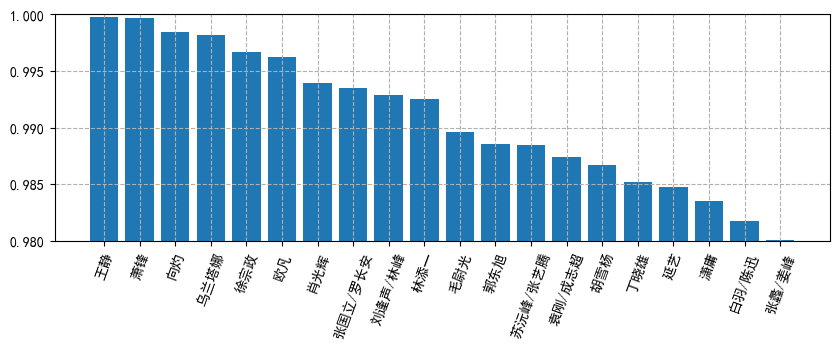

In [52]:
# 设置中文:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 中文负号
plt.rcParams['axes.unicode_minus'] = False

# 设置分别率 为100
plt.rcParams['figure.dpi'] = 100
# 设置大小
plt.rcParams['figure.figsize'] = (10,3)
# 绘制图形
plt.bar(result_q1.index,result_q1['好评率'])
# 设置y轴范围
plt.ylim(0.98,1)
# 设置x轴文字倾斜
plt.xticks(rotation=70)
# 设置网格
plt.grid(True, linestyle='--')

<AxesSubplot:title={'center':'不同导演电影的好评率'}, xlabel='导演'>

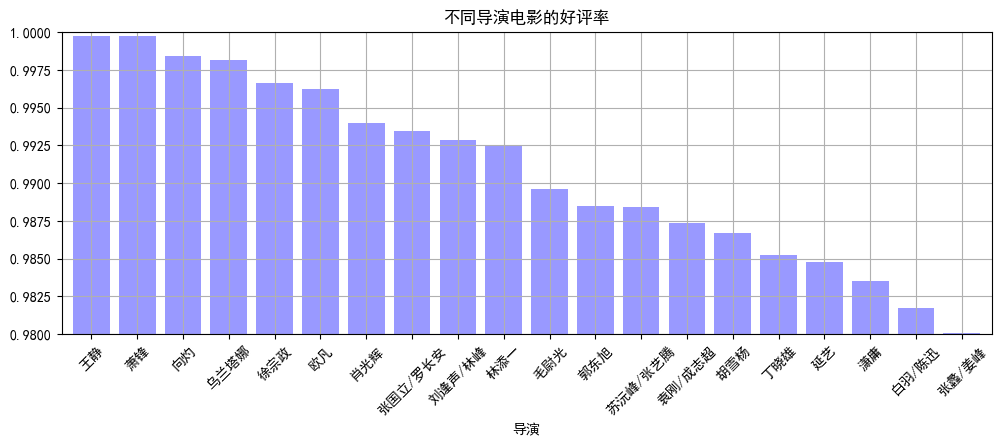

In [53]:
# 绘制柱状图
result_q1['好评率'].plot(kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.4,
       rot = 45,
       grid = True,
       ylim = [0.98,1],
       figsize = (12,4),
       title = '不同导演电影的好评率')

问题2 

    统计分析2001-2016年每年评影人数总量
    求出不同剧的评分人数、好评数总和
    

In [54]:
data.head(2)

,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0
1,2016年5月24日,NaN,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,NaN,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,NaN,7291.0,39492.0,70213917.0,NaN,32.0,1,32201.0


In [55]:
# 统计分析2001-2016年每年评影人数总量
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   数据获取日期  99999 non-null  object 
 1   演员      97981 non-null  object 
 2   视频ID    99999 non-null  object 
 3   详细链接    99998 non-null  object 
 4   剧名      99999 non-null  object 
 5   状态      99158 non-null  object 
 6   类型      99999 non-null  object 
 7   来源平台    99999 non-null  object 
 8   整理后剧名   99999 non-null  object 
 9   更新时间    644 non-null    object 
 10  上映时间    78755 non-null  float64
 11  语言      85926 non-null  object 
 12  评分      99970 non-null  float64
 13  地区      98728 non-null  object 
 14  上映年份    78755 non-null  float64
 15  简介      99970 non-null  object 
 16  导演      97614 non-null  object 
 17  差评数     99970 non-null  float64
 18  评分人数    99970 non-null  float64
 19  播放量     99453 non-null  float64
 20  更新至     1272 non-null   float64
 21  总集数     98871 non-null  float64
 22

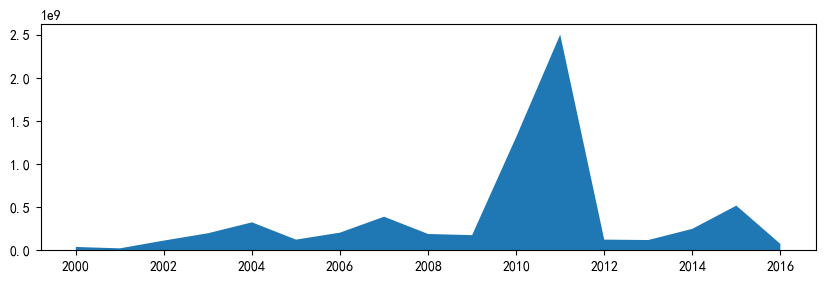

In [56]:
movie_year = data.groupby('上映年份')[['评分人数']].sum()
# 取出大于2000年的数据
movie_year_2000 = movie_year.loc[2000:]
# 绘制面积图
plt.stackplot(movie_year_2000.index,movie_year_2000['评分人数'])

In [57]:
# 求出不同剧的评分人数、好评数总和, 好评数前20绘图
movie_title_group = data.groupby('整理后剧名')[['评分人数','好评数']].sum()
result_title = movie_title_group.sort_values('好评数',ascending=False)[:20]
result_title

,评分人数,好评数
整理后剧名,,
回家的诱惑,1.014866e+09,1.014811e+09
宫锁心玉,9.324091e+08,8.586994e+08
爱情公寓2,5.771680e+08,5.421958e+08
爱情公寓4,4.849908e+08,4.328469e+08
花千骨,5.143373e+08,4.301854e+08
终极1家,3.161218e+08,3.056825e+08
盗墓笔记,3.121707e+08,2.583803e+08
克拉恋人,3.011078e+08,2.560921e+08
天龙8部,2.570178e+08,2.493245e+08


<AxesSubplot:title={'center':'不同剧的好评数'}, xlabel='整理后剧名'>

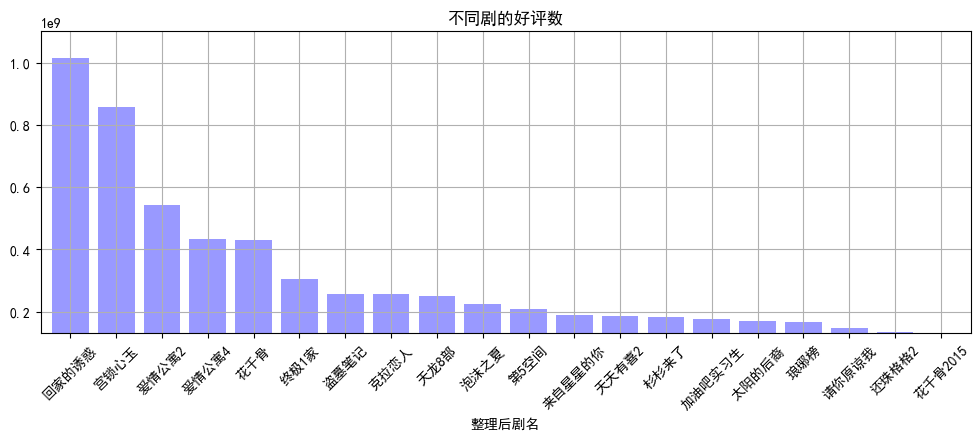

In [58]:
# 绘制柱状图
result_title['好评数'].plot(kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.4,
       rot = 45,
       grid = True,
       ylim = [1.3e+08,1.1e+09],
       figsize = (12,4),
       title = '不同剧的好评数')

问题1

    分析出不同导演电影的好评率，并筛选出TOP20

In [84]:
# 读取文件
data = pd.read_csv('./data/爱奇艺视频数据.csv',encoding="gbk")
data

C:\Users\72997\AppData\Local\Temp\ipykernel_22152\2651801604.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/爱奇艺视频数据.csv',encoding="gbk")


,数据获取日期,演员,视频ID,详细链接,剧名,状态,类型,来源平台,整理后剧名,更新时间,...,上映年份,简介,导演,差评数,评分人数,播放量,更新至,总集数,第几季,好评数
0,2016年5月24日,NaN,100,http://www.iqiyi.com/dianshiju/douyu2.html,斗鱼Ⅱ(1-20)全集,已完结,粤语电视剧/偶像剧/言情剧/超清1080P,爱奇艺,斗鱼2,NaN,...,2004.0,在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语燕为了让自己不再是于皓的包...,NaN,2034.0,32722.0,8069526.0,NaN,20.0,2,30688.0
1,2016年5月24日,NaN,1037,http://www.iqiyi.com/dianshiju/jhuxd.html,江湖兄弟(1-32)全集,已完结,粤语电视剧/悬疑剧/年代剧/超清1080P,爱奇艺,江湖兄弟全集,NaN,...,2008.0,1930年代，海龙城首富唐英明用五斗上等珍珠，击败列国商业对手，买得与铁达尼齐名之奥丽号邮轮...,NaN,7291.0,39492.0,70213917.0,NaN,32.0,1,32201.0
2,2016年5月24日,NaN,1573,http://www.iqiyi.com/dianshiju/fmxqj2.html,肥猫寻亲记2(1-30)全集,已完结,粤语电视剧/家庭剧/喜剧,爱奇艺,肥猫寻亲记2全集,NaN,...,2005.0,肥猫经历了几番风雨，终于寻回了他的亲生弟妹们：年轻有为的医生二弟华世杰、大律师三妹婉容、美丽...,NaN,1183.0,10105.0,3310768.0,NaN,30.0,1,8922.0
3,2016年5月24日,NaN,1739,http://www.iqiyi.com/dianshiju/qtjm.html,舞台姐妹(1-34)全集,已完结,粤语电视剧/年代剧/家庭剧,爱奇艺,舞台姐妹全集,NaN,...,2006.0,一对原本乡下“阳春舞台班“苦命姐妹春花和月红，在戏霸唐经理的阴谋算计下来到大上海的灯红酒绿下...,NaN,451.0,2639.0,2088958.0,NaN,34.0,1,2188.0
4,2016年5月24日,NaN,1756,http://www.iqiyi.com/dianshiju/18jbj.html,18禁不禁(1-30)全集,已完结,粤语电视剧/偶像剧/超清1080P/喜剧,爱奇艺,18禁不禁全集,NaN,...,2007.0,一部台湾偶像剧，由三个偶像团体（模范棒棒堂Choc7、黑Girl、翼势力）的成员和多位新进演...,NaN,63551.0,748338.0,41287893.0,NaN,30.0,1,684787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2016年4月9日,陈浩民/林子聪/叶祖新/周觅/馨子/张亮,123614,http://www.iqiyi.com/a_19rrk33ec5.html,活佛济公2,已完结,喜剧/神话剧/古装剧,爱奇艺,活佛济公2,NaN,...,2011.0,传说前世为降龙尊者的济公降生到善人李茂春家中，取名李修缘，后投身灵隐寺，自号“济癫”。在灵隐...,林添一/王伟庭,66844.0,585686.0,331000000.0,NaN,60.0,2,518844.0
99995,2016年4月9日,陈浩民/林子聪/陈威翰/唐熙/陈紫函/穆婷婷/关智斌,202112301,http://www.iqiyi.com/a_19rrhbwt35.html,新济公活佛,已完结,神话剧/武侠剧/古装剧/剧情,爱奇艺,新济公活佛,NaN,...,NaN,该剧改编自小说《济公传》，剧中主要角色济颠和尚在历史上确有其人，他以一个穷和尚之姿，笑闹的性...,梁辛全,149588.0,1547416.0,984000000.0,NaN,80.0,1,1397828.0
99996,2016年4月9日,陈浩民/林子聪/陈威翰/唐熙/陈紫函/穆婷婷/关智斌,202112401,http://www.iqiyi.com/a_19rrhbwt8d.html,新济公活佛未删减版,已完结,神话剧/武侠剧/古装剧/剧情,爱奇艺,新济公活佛,NaN,...,NaN,该剧改编自小说《济公传》，剧中主要角色济颠和尚在历史上确有其人，他以一个穷和尚之姿，笑闹的性...,梁辛全,7637.0,45380.0,48930000.0,NaN,85.0,1,37743.0
99997,2016年4月9日,陈浩民/林子聪/陈威翰/唐熙/陈紫函/穆婷婷/关智斌,203114101,http://www.iqiyi.com/a_19rrhb9o2h.html,新济公活佛下部,已完结,神话剧/古装剧,爱奇艺,新济公活佛下部,NaN,...,NaN,该剧改编自小说《济公传》，剧中主要角色济颠和尚在历史上确有其人，他以一个穷和尚之姿，笑闹的性...,梁辛全,51020.0,364915.0,384000000.0,NaN,47.0,1,313895.0


In [60]:
df=data.groupby('导演')[['好评数','评分人数']].sum()
df['好评率']=df['好评数']/df['评分人数']
df

,好评数,评分人数,好评率
导演,,,
Exact,375172.0,458543.0,0.818183
John Fawcett Steve Dimarco Paul Fox,1477942.0,1729878.0,0.854362
Michael Cuesta,527348.0,604104.0,0.872942
Michael Dinner,1032245.0,1312847.0,0.786265
Michael Engler,47804.0,61844.0,0.772977
...,...,...,...
龚朝,4634.0,8620.0,0.537587
龚朝/杨巧文/王伟仁,676160.0,964912.0,0.700748
龚朝晖,4044245.0,5941895.0,0.680632


In [61]:
df

,好评数,评分人数,好评率
导演,,,
Exact,375172.0,458543.0,0.818183
John Fawcett Steve Dimarco Paul Fox,1477942.0,1729878.0,0.854362
Michael Cuesta,527348.0,604104.0,0.872942
Michael Dinner,1032245.0,1312847.0,0.786265
Michael Engler,47804.0,61844.0,0.772977
...,...,...,...
龚朝,4634.0,8620.0,0.537587
龚朝/杨巧文/王伟仁,676160.0,964912.0,0.700748
龚朝晖,4044245.0,5941895.0,0.680632


In [64]:
df1=df.sort_values(['好评率'],ascending=False)[:20]
df1

,好评数,评分人数,好评率
导演,,,
王静,5.601448e+06,5.602704e+06,0.999776
萧锋,4.415545e+07,4.416801e+07,0.999716
向灼,3.685386e+06,3.691240e+06,0.998414
乌兰塔娜,1.916524e+07,1.920091e+07,0.998142
徐宗政,3.113422e+06,3.123920e+06,0.996639
欧凡,3.088701e+06,3.100421e+06,0.996220
肖光辉,3.264290e+05,3.284140e+05,0.993956
张国立/罗长安,8.177111e+06,8.230880e+06,0.993467
刘逢声/林峰,3.591638e+06,3.617351e+06,0.992892


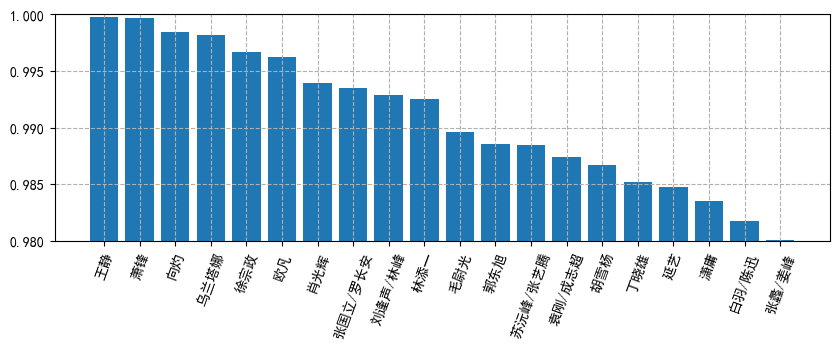

In [67]:
# 设置中文:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 中文负号
plt.rcParams['axes.unicode_minus'] = False

# 设置分别率 为100
plt.rcParams['figure.dpi'] = 100
# 设置大小
plt.rcParams['figure.figsize'] = (10,3)
# 绘制图形
plt.bar(df1.index,df1['好评率'])
# 设置y轴范围
plt.ylim(0.98,1)
# 设置x轴文字倾斜
plt.xticks(rotation=70)
# 设置网格
plt.grid(True, linestyle='--')

<AxesSubplot:title={'center':'不同导演电影的好评率'}, xlabel='导演'>

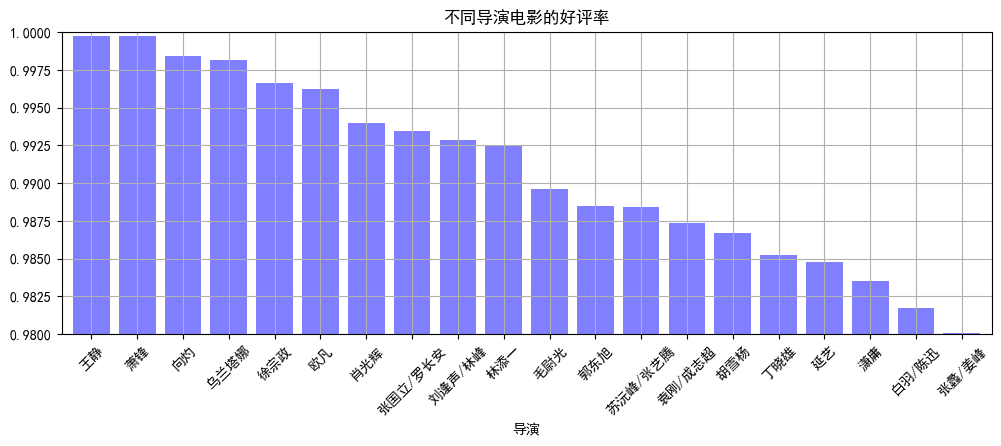

In [83]:
# 绘制柱状图
df1['好评率'].plot(
       kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.5,
       rot = 45,
       grid = True,
       ylim = [0.98,1],
       figsize = (12,4),
       title = '不同导演电影的好评率')

<AxesSubplot:title={'center':'不同导演电影的好评率'}, xlabel='导演'>

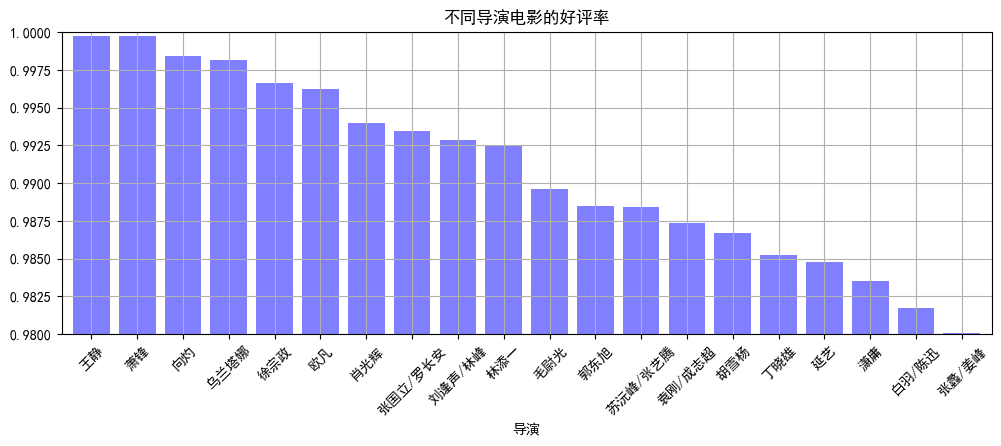

In [82]:
# 绘制柱状图
df1['好评率'].plot(
       kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.5,
       rot = 45,
       grid = True,
       ylim = [0.98,1],
       figsize = (12,4),
       title = '不同导演电影的好评率')

问题2

     统计分析2001-2016年每年评影人数总量
    求出不同剧的评分人数、好评数总和

In [89]:
mf=data.groupby('上映时间')['好评数','评分人数'].sum()
mf[2001:2016]

C:\Users\72997\AppData\Local\Temp\ipykernel_22152\2567255278.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mf=data.groupby('上映时间')['好评数','评分人数'].sum()


,好评数,评分人数
上映时间,,
2001.0,1.882361e+07,2.244432e+07
2002.0,1.013072e+08,1.129358e+08
2003.0,1.832410e+08,1.975438e+08
2004.0,3.093309e+08,3.246421e+08
2005.0,1.114340e+08,1.239016e+08
2006.0,1.851264e+08,2.049908e+08
2007.0,3.703962e+08,3.902796e+08
2008.0,1.738169e+08,1.892359e+08
2009.0,1.577503e+08,1.758459e+08


In [ ]:
# 绘制柱状图
df1['好评率'].plot(
       kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.5,
       rot = 45,
       grid = True,
       ylim = [0.98,1],
       figsize = (12,4),
       title = '不同年份的')

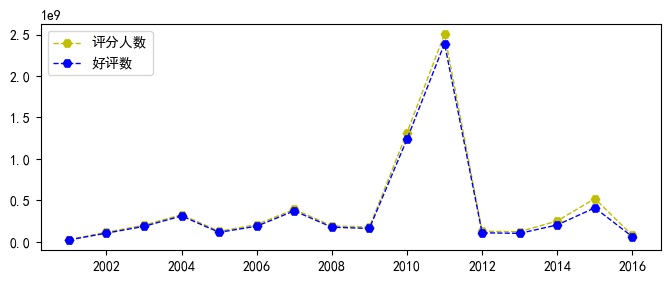

In [92]:

"""linewidth 设置线条粗细
   label 设置线条标签
   color 设置线条颜色
   linestyle 设置线条形状
   marker 设置线条样点标记
"""
mf1=mf[2001:2016]
plt.plot(mf1.index, mf1['评分人数'], linewidth = '1', label = "评分人数", color='y', linestyle='--', marker='H')
plt.plot(mf1.index, mf1['好评数'], linewidth = '1', label = "好评数", color='b', linestyle='--', marker='H')
plt.rcParams['figure.figsize']=(8,3)
# plt.rcParams['figure.dpi']=300
plt.legend(loc='upper left')